From sklearn.datasets load digits dataset and do following
 1. Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv 
 1. Plot confusion matrix
 1. Plot classification report

[Solution link](https://github.com/codebasics/py/blob/master/ML/17_knn_classification/Exercise/knn_exercise_digits_solution.ipynb)


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_digits
digits=load_digits()

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9916666666666667

In [5]:
# from sklearn import neighbors 
# n=neighbors 
# dir(n)

In [6]:
# help(KNeighborsClassifier)

In [7]:
knn1=KNeighborsClassifier(n_neighbors=7)
knn1.fit(X_train,y_train)
knn1.score(X_test,y_test)

0.9888888888888889

In [8]:
from sklearn.model_selection import GridSearchCV

In [42]:
clf = GridSearchCV(KNeighborsClassifier(),
                   {
                       'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                       'p': [1, 2],
                       'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
                   },
                   cv=10,
                   return_train_score=False)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'p': [1, 2]})

In [43]:
import pandas as pd
check=pd.DataFrame(clf.cv_results_)
check

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000783,0.001760,0.031926,0.003495,auto,1,1,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}",0.972222,0.979167,...,0.972222,0.986111,0.965278,0.972222,1.000000,0.979021,0.986014,0.979837,0.009542,24
1,0.000000,0.000000,0.016128,0.000772,auto,1,2,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}",0.986111,0.986111,...,0.979167,0.986111,0.979167,0.972222,1.000000,0.979021,1.000000,0.985402,0.008488,1
2,0.000000,0.000000,0.032420,0.001367,auto,2,1,"{'algorithm': 'auto', 'n_neighbors': 2, 'p': 1}",0.965278,0.965278,...,0.958333,0.986111,0.951389,0.958333,0.993007,0.965035,0.979021,0.970790,0.013459,78
3,0.000000,0.000000,0.016077,0.000676,auto,2,2,"{'algorithm': 'auto', 'n_neighbors': 2, 'p': 2}",0.965278,0.986111,...,0.972222,0.986111,0.958333,0.972222,1.000000,0.965035,1.000000,0.979142,0.013913,29
4,0.000159,0.000477,0.033948,0.006385,auto,3,1,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}",0.979167,0.958333,...,0.972222,0.986111,0.972222,0.979167,0.993007,0.965035,1.000000,0.979138,0.012051,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.003155,0.006310,0.022640,0.007669,brute,9,2,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}",0.972222,0.958333,...,0.958333,0.972222,0.965278,0.986111,0.993007,0.979021,0.986014,0.975665,0.011704,58
84,0.001592,0.004777,0.044132,0.010309,brute,10,1,"{'algorithm': 'brute', 'n_neighbors': 10, 'p': 1}",0.972222,0.951389,...,0.951389,0.979167,0.958333,0.972222,0.979021,0.979021,0.972028,0.970090,0.011615,81
85,0.001562,0.004685,0.022665,0.007928,brute,10,2,"{'algorithm': 'brute', 'n_neighbors': 10, 'p': 2}",0.972222,0.965278,...,0.958333,0.979167,0.965278,0.979167,0.993007,0.979021,0.979021,0.975660,0.009924,62
86,0.001581,0.004744,0.038084,0.007939,brute,11,1,"{'algorithm': 'brute', 'n_neighbors': 11, 'p': 1}",0.972222,0.944444,...,0.944444,0.986111,0.965278,0.972222,0.979021,0.965035,0.965035,0.967992,0.013957,86


In [44]:
clf.best_score_ 

0.9854020979020979

In [45]:
clf.best_params_ 

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}

In [46]:
check[check.param_n_neighbors==5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,0.001835,0.004670,0.033340,0.004983,auto,5,1,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}",0.979167,0.965278,...,0.979167,0.986111,0.972222,0.986111,0.993007,0.965035,0.993007,0.980522,0.009748,22
9,0.000000,0.000000,0.022484,0.009989,auto,5,2,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2}",0.965278,0.979167,...,0.979167,0.993056,0.972222,0.979167,0.993007,0.979021,1.000000,0.982619,0.009943,5
30,0.016703,0.001627,0.047357,0.006103,ball_tree,5,1,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.979167,0.972222,...,0.972222,0.986111,0.972222,0.986111,0.986014,0.965035,0.993007,0.979822,0.008504,28
31,0.019155,0.006095,0.041335,0.007120,ball_tree,5,2,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.965278,0.979167,...,0.979167,0.993056,0.972222,0.979167,0.993007,0.979021,1.000000,0.982619,0.009943,5
52,0.036982,0.007536,0.046444,0.004808,kd_tree,5,1,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'p'...",0.979167,0.972222,...,0.972222,0.986111,0.972222,0.986111,0.993007,0.972028,0.993007,0.981221,0.008254,16
53,0.035542,0.006526,0.052747,0.006781,kd_tree,5,2,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'p'...",0.965278,0.979167,...,0.979167,0.993056,0.972222,0.979167,0.993007,0.979021,1.000000,0.982619,0.009943,5
74,0.000000,0.000000,0.046030,0.009949,brute,5,1,"{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1}",0.979167,0.965278,...,0.979167,0.986111,0.972222,0.986111,0.993007,0.965035,0.993007,0.980522,0.009748,22
75,0.000000,0.000000,0.024251,0.008167,brute,5,2,"{'algorithm': 'brute', 'n_neighbors': 5, 'p': 2}",0.965278,0.979167,...,0.979167,0.993056,0.972222,0.979167,0.993007,0.979021,1.000000,0.982619,0.009943,5


In [13]:
# help(GridSearchCV)

In [14]:
y_pred=knn.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix


In [16]:
cm=confusion_matrix(y_test,y_pred)


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

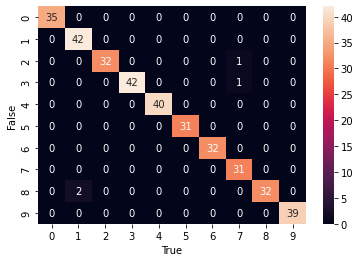

In [18]:
sns.heatmap(cm,annot=True)
plt.xlabel('True')
plt.ylabel('False')
plt.show()

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      1.00      0.98        42
           2       1.00      0.97      0.98        33
           3       1.00      0.98      0.99        43
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        32
           7       0.94      1.00      0.97        31
           8       1.00      0.94      0.97        34
           9       1.00      1.00      1.00        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



<AxesSubplot:>

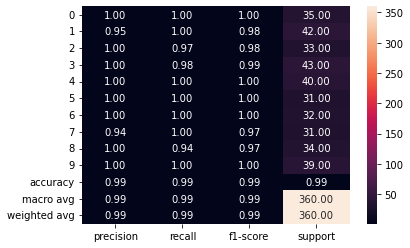

In [21]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
df = pd.DataFrame(report).transpose() 


# Create a heatmap
sns.heatmap(df, annot=True, fmt=".2f")

In [22]:
report


{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 35},
 '1': {'precision': 0.9545454545454546,
  'recall': 1.0,
  'f1-score': 0.9767441860465117,
  'support': 42},
 '2': {'precision': 1.0,
  'recall': 0.9696969696969697,
  'f1-score': 0.9846153846153847,
  'support': 33},
 '3': {'precision': 1.0,
  'recall': 0.9767441860465116,
  'f1-score': 0.988235294117647,
  'support': 43},
 '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 40},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 31},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32},
 '7': {'precision': 0.9393939393939394,
  'recall': 1.0,
  'f1-score': 0.96875,
  'support': 31},
 '8': {'precision': 1.0,
  'recall': 0.9411764705882353,
  'f1-score': 0.9696969696969697,
  'support': 34},
 '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 39},
 'accuracy': 0.9888888888888889,
 'macro avg': {'precision': 0.9893939393939395,
  'recall': 0.9887617

In [23]:
knn2=KNeighborsClassifier() # {'algorithm':'auto','n_neighbors':5,'p':2}-->(Default)  vs  {'algorithm': 'auto','n_neighbors': 3,'p': 2}
knn2.fit(X_train,y_train)
knn2.score(X_test,y_test)

0.9916666666666667

In [47]:
knn2.score(X_train,y_train)

0.9874739039665971

In [24]:
help(KNeighborsClassifier())

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors o